### 🖋 **Notebook Contents**

0. Initial Setup
1. Business Problem Understanding
2. Data Understanding
3. Data Preparation

****

## `Initial Setup`

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import missingno as msno

import warnings
warnings.filterwarnings("ignore")

## `Business Problem`

## `Data Understanding`

Dataset can be access through this link: [dataset!](https://www.kaggle.com/datasets/arnabchaki/data-science-salaries-2023)

| Columns                                            | Definition                                                   | 
| ------------------------------------------------- | ------------------------------------------------------------ |
| `work_year` | The year the salary was paid. |
| `experience_level` | The experience level in the job during the year |
| `employment_type` | The type of employment for the role |
| `job_title` | The role worked in during the year. |
| `salary` | The total gross salary amount paid. |
| `salary_currency` |  The currency of the salary paid as an ISO 4217 currency code. |
| `salary_in_usd` | The salary in USD |
| `employee_residence` | Employee's primary country of residence in during the work year as an ISO 3166 country code. |
| `remote_ratio` | The overall amount of work done remotely |
| `company_location` | The country of the employer's main office or contracting branch |
| `company_size` | The median number of people that worked for the company during the year |

In [2]:
data = pd.read_csv("../data/raw/ds_salaries.csv")
data.sample(10)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
2045,2022,MI,FT,Data Analyst,100000,USD,100000,US,0,US,M
3374,2022,SE,FT,Data Scientist,210000,USD,210000,US,100,US,M
3409,2022,SE,FT,Machine Learning Engineer,65000,USD,65000,AE,100,AE,S
94,2023,SE,FT,Data Scientist,70000,USD,70000,US,0,US,M
1511,2023,SE,FT,Data Engineer,130000,USD,130000,US,100,US,M
1560,2023,SE,FT,Research Scientist,210000,USD,210000,US,0,US,M
3486,2022,EN,FT,Financial Data Analyst,100000,USD,100000,US,50,US,L
3403,2022,MI,FT,Data Scientist,70000,GBP,86193,GB,0,GB,M
3207,2022,SE,FT,Machine Learning Engineer,164996,USD,164996,US,0,US,M
2415,2022,MI,FT,Data Analyst,109000,USD,109000,US,0,US,M


In [3]:
pd.DataFrame(
                {
                'columns': data.columns.values,
                'data_type': data.dtypes.values,
                'null_value(%)': data.isna().mean().values * 100,
                'n_unique': data.nunique().values,
                'zero_value' : [True if (data[col] == 0).any() else False for col in data.columns],
                'neg_value' : [True if (data[col].dtype == int or data[col].dtype == float) and (data[col] < 0).any() else False for col in data.columns],
                'min': data.min().values,
                'max': data.max().values,
                'sample_unique': [data[col].unique() for col in data.columns]
                }
            )

,columns,data_type,null_value(%),n_unique,zero_value,neg_value,min,max,sample_unique
0,work_year,int64,0.0,4,False,False,2020,2023,"[2023, 2022, 2020, 2021]"
1,experience_level,object,0.0,4,False,False,EN,SE,"[SE, MI, EN, EX]"
2,employment_type,object,0.0,4,False,False,CT,PT,"[FT, CT, FL, PT]"
3,job_title,object,0.0,93,False,False,3D Computer Vision Researcher,Staff Data Scientist,"[Principal Data Scientist, ML Engineer, Data S..."
4,salary,int64,0.0,815,False,False,6000,30400000,"[80000, 30000, 25500, 175000, 120000, 222200, ..."
5,salary_currency,object,0.0,20,False,False,AUD,USD,"[EUR, USD, INR, HKD, CHF, GBP, AUD, SGD, CAD, ..."
6,salary_in_usd,int64,0.0,1035,False,False,5132,450000,"[85847, 30000, 25500, 175000, 120000, 222200, ..."
7,employee_residence,object,0.0,78,False,False,AE,VN,"[ES, US, CA, DE, GB, NG, IN, HK, PT, NL, CH, C..."
8,remote_ratio,int64,0.0,3,True,False,0,100,"[100, 0, 50]"
9,company_location,object,0.0,72,False,False,AE,VN,"[ES, US, CA, DE, GB, NG, IN, HK, NL, CH, CF, F..."


**_Insight_**:
- This dataset contains 3755 rows and 11 columns
- Variable data type:
<br>
    a. Numerical Variable
    <br>
        - Discrete : -
        <br>
        - Continue : salary, salary_in_usd

    b. Categorical Variable
    <br>
        - Nominal : employment_type, job_title, salary_currency, employee_residence, company_location
        <br>
        - Ordinal : experience_level, remote_ratio, company_size

    c. Datetime Variable
    <br>
        - work_year
- Categorical columns with high cardinality (more than 10 categories): job_title, salary_currency, employee_residence, company_location
- There is no missing values

### 1️⃣ Numerical Variable
Because we're going to use salary_in_usd column only, so we only check that column.

In [4]:
# check the distribution of salary_in_usd column

def distboxplot(data, bins, xticks, xlim, xlabel, unit, title=None, column=None, figsize=None):
    plt.style.use('default')
    fig, axes = plt.subplots(
        nrows=2,
        ncols=1,
        figsize=figsize,
        gridspec_kw={'height_ratios':[4,1]},
        sharex=True
    )

    if column:
        sns.histplot(data=data, x=column, bins=bins, kde=True, ax=axes[0])
        axes[1].boxplot(data=data, x=column, patch_artist=True, meanline=True, showmeans=True, vert=False)
        # calculate central tendencies
        mean = data[column].mean()
        median = data[column].median()
        mad = abs(data[column] - data[column].median()).median()
    else:
        sns.histplot(data=data, bins=bins, kde=True, ax=axes[0])
        axes[1].boxplot(data, patch_artist=True, meanline=True, showmeans=True, vert=False)
        # calculate central tendencies
        mean = data.mean()
        median = data.median()
        mad = abs(data - data.median()).median()
    
    # create tendencies measurement lines
    axes[0].axvline(x=mean, color="limegreen", linestyle="--", label=f"mean: {mean:.2f} {unit}")
    axes[0].axvline(x=median, color="orange", linestyle="-", label=f"median: {median:.2f} {unit}")

    axes[0].legend()
    axes[0].set_xlim(xlim[0], xlim[1])

    axes[1].set_xlabel(xlabel)
    axes[1].set_xticks(xticks)
    axes[1].set(yticklabels=[])

    if title:
        axes[0].set_title(title)
    plt.show();

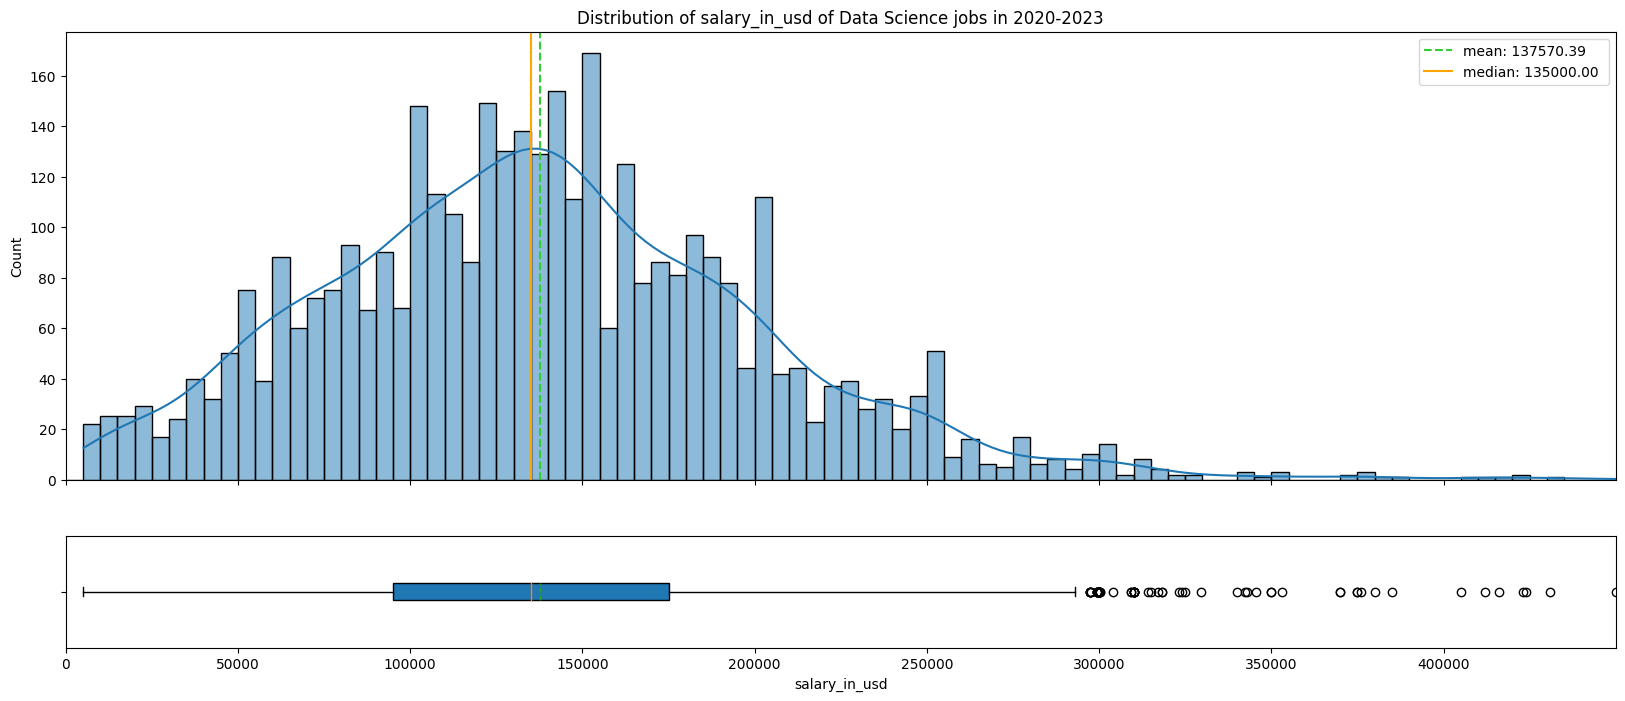

In [5]:
distboxplot(data=data, column='salary_in_usd', bins=np.arange(0,450000,5000),
            xticks=np.arange(0,450000,50000), xlim=[0,450000], xlabel='salary_in_usd', unit='',
            title='Distribution of salary_in_usd of Data Science jobs in 2020-2023', figsize=(20,8))

**_Insight_**:
- salary_in_usd column has **non-normal data distribution** (slightly right-skewed). Outliers were also detected but will not be handled further, since they are the response or **target variables** in the modeling.

### 2️⃣ Categorical Variable

- Nominal Variable : employment_type, job_title, salary_currency, employee_residence, company_location
- Ordinal Variable : experience_level, remote_ratio, company_size

In [6]:
def countplots_custom(dataset, columns_list, rows, cols, suptitle,size=(20,16)):
    """Function to make seaborn count plot of all of columns. To see the distribution of the discrete variable

    Args:
    -----
        dataset : DataFrame
        columns_list (string) : numerical columns
        rows : number of rows of axes
        cols : number of cols of axes
        suptitle : title of the plots
        size : size of canvas

    Return:
    -----
        histogram plot
    """

    # plot the graphs
    fig, axs = plt.subplots(rows, cols,  figsize=size)
    fig.suptitle(suptitle,y=0.93, size=16)
    axs = axs.flatten()
    for i, data in enumerate(columns_list):
        if i % cols == 0:
            axs[i].set_ylabel('Count')
        graph = sns.countplot(data=dataset, x=data, ax=axs[i])
        axs[i].set_title(data)

        # annotations
        for p in graph.patches:
            percentage = f'{100 * p.get_height() / len(dataset):.1f}%\n'
            x = p.get_x() + p.get_width() / 2
            y = p.get_height()
            graph.annotate(percentage, (x, y), ha='center', va='center')

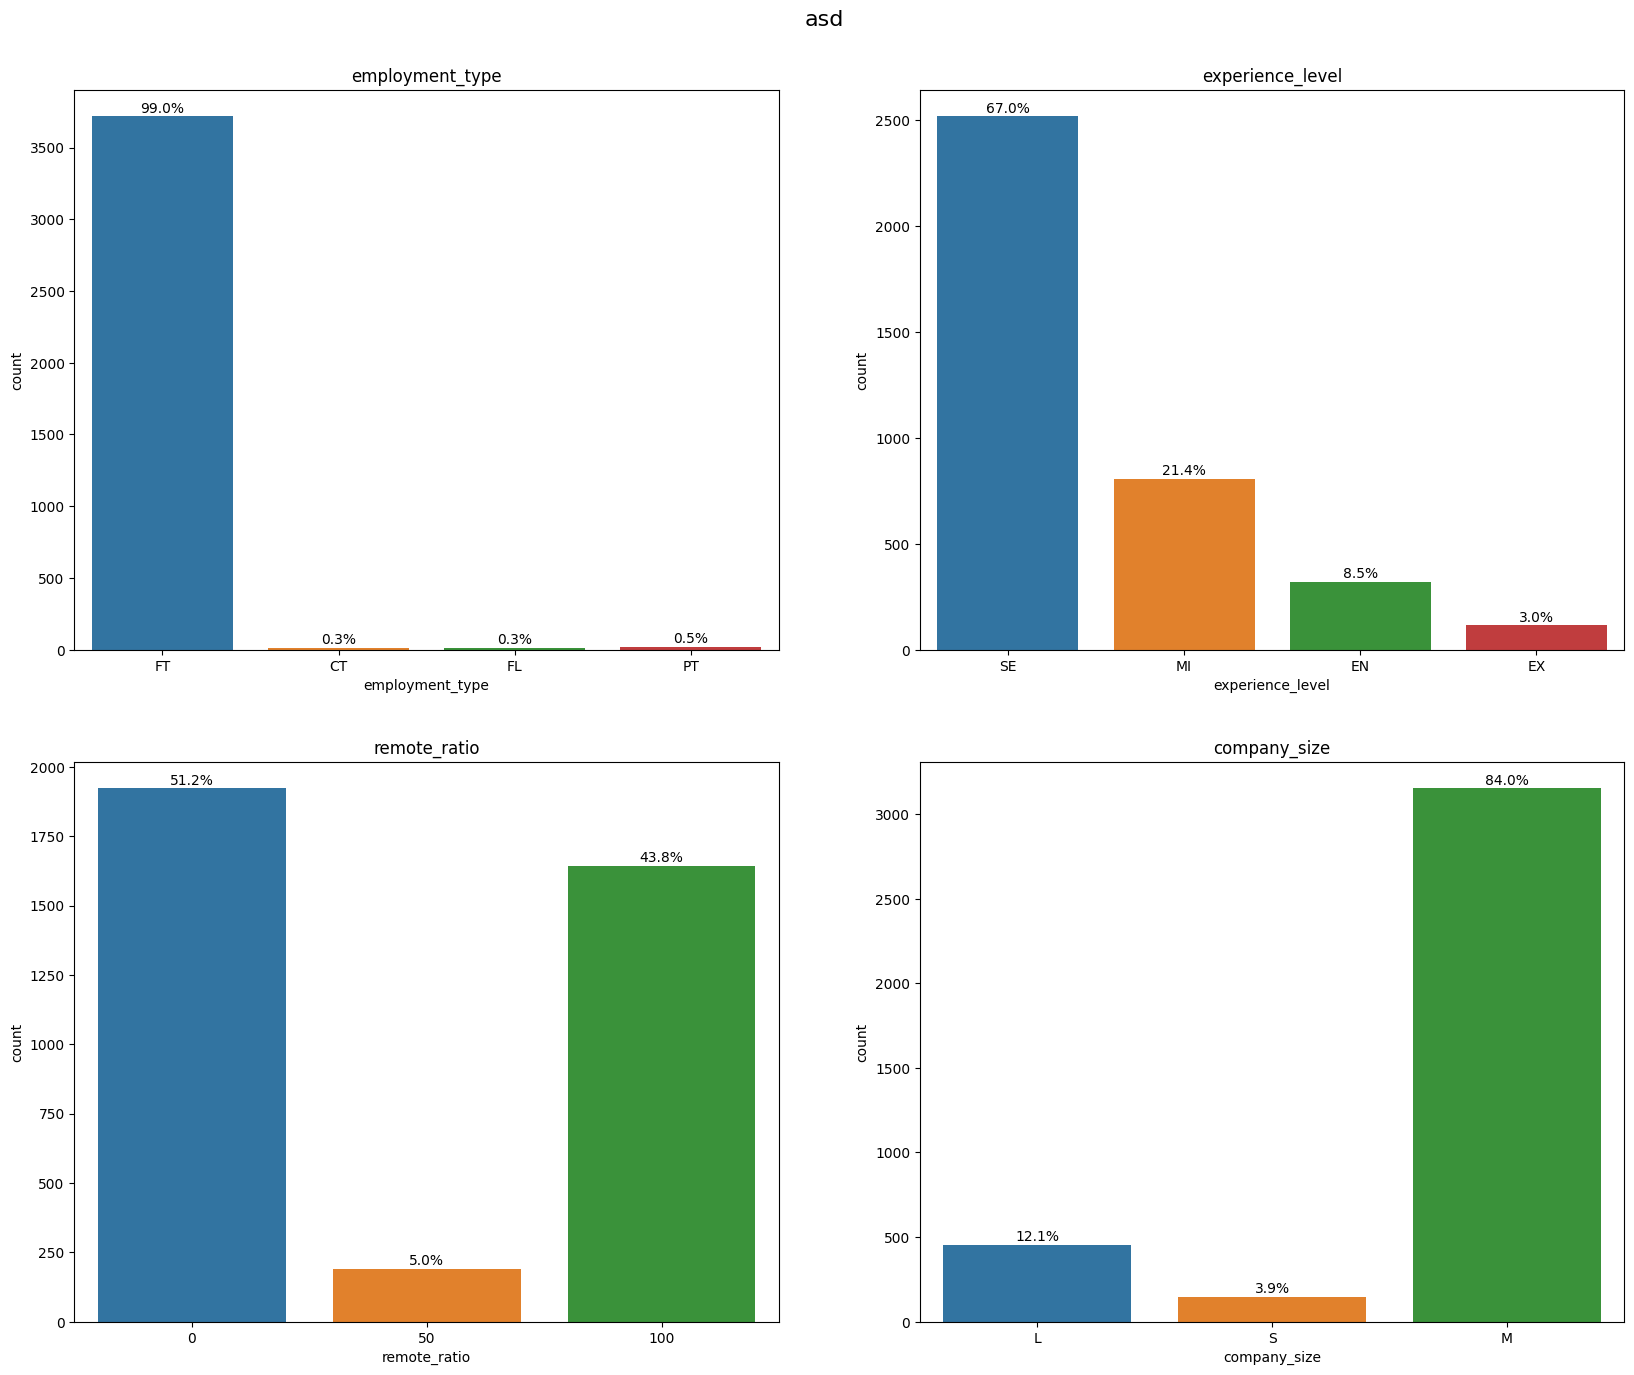

In [7]:
# plot categorical columns that do not have high cardinality (job_title, salary_currency, employee_residence, company_location)
countplots_custom(data, ['employment_type', 'experience_level', 'remote_ratio', 'company_size'], 2, 2, 'asd',size=(20,16))

## `Data Cleaning`

### High Cardinality

#### Job Title

##### job_position

In [89]:
# job_position

position = ['STAFF', 'LEAD', 'MANAGER', 'HEAD', 'DIRECTOR']

def convPost(x):
    if position[0] in x:
        return position[0]
    elif position[1] in x:
        return position[1]
    elif position[2] in x:
        return position[2]
    elif position[3] in x:
        return position[3]
    elif position[4] in x:
        return position[4]
    else:
        return 'STAFF'


In [90]:
data['job_position'] = data['job_title'].str.upper().apply(lambda x: convPost(x))
data['job_position'].value_counts()

job_position
STAFF       3573
MANAGER      113
LEAD          38
HEAD          20
DIRECTOR      11
Name: count, dtype: int64

##### job_scope

In [124]:
# scope

scope = ['DATA SCIEN', 'DATA ANALY', 'DATA ENGIN']

def convScp(x):
    if 'DATA SCIEN' in x:
        return 'DATA SCIENTIST'
    elif 'DATA ANALY' in x:
        return 'DATA ANALYST'
    elif any([t in x for t in ['DATA ENGINEER','ETL','DATABASE']]) or ('DATA' in x and 'ENGINEER' in x):
        return 'DATA ENGINEER'
    elif any([t in x for t in ['ML','MACHINE LEARNING','AI','ARTIFICIAL INTELLIGENCE','COMPUTER VISION','NLP', 'DEEP LEARNING']]):
        return 'ML/AI ENGINEER'
    elif any([t in x for t in ['BI', 'BUSINESS INTELLIGENCE']]):
        return 'BUSINESS INTELLIGENCE'
    elif 'ANALYTICS ENGINEER' in x:
        return 'ANALYTICS ENGINEER'
    elif 'DATA ARCHITECT' in x:
        return 'DATA ARCHITECT'
    elif any([t in x for t in ['RESEARCH','APPLIED']]):
        return 'RESEARCH/APPLIED SCIENTIST'
    else:
        return 'OTHERS'

In [125]:
data['job_scope'] = data['job_title'].str.upper().apply(lambda x: convScp(x))
data['job_scope'].value_counts()

job_scope
DATA ENGINEER                 1101
DATA SCIENTIST                 987
DATA ANALYST                   696
ML/AI ENGINEER                 483
RESEARCH/APPLIED SCIENTIST     177
ANALYTICS ENGINEER             103
DATA ARCHITECT                 103
OTHERS                          76
BUSINESS INTELLIGENCE           29
Name: count, dtype: int64

In [126]:
data.query("job_scope == 'OTHERS'")['job_title'].value_counts()

job_title
Data Manager                     29
Data Specialist                  14
Head of Data                     10
Data Quality Analyst              7
Data Operations Analyst           4
Data Modeler                      2
Data Strategist                   2
Autonomous Vehicle Technician     2
Insight Analyst                   2
Data Lead                         2
Manager Data Management           1
Data Management Specialist        1
Name: count, dtype: int64

### CLEAN DATA

In [128]:
dataClean = data.copy().drop(columns=['job_title','salary','salary_currency'])
dataClean

,work_year,experience_level,employment_type,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,job_position,job_scope
0,2023,SE,FT,85847,ES,100,ES,L,STAFF,DATA SCIENTIST
1,2023,MI,CT,30000,US,100,US,S,STAFF,ML/AI ENGINEER
2,2023,MI,CT,25500,US,100,US,S,STAFF,ML/AI ENGINEER
3,2023,SE,FT,175000,CA,100,CA,M,STAFF,DATA SCIENTIST
4,2023,SE,FT,120000,CA,100,CA,M,STAFF,DATA SCIENTIST
...,...,...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,412000,US,100,US,L,STAFF,DATA SCIENTIST
3751,2021,MI,FT,151000,US,100,US,L,STAFF,DATA SCIENTIST
3752,2020,EN,FT,105000,US,100,US,S,STAFF,DATA SCIENTIST
3753,2020,EN,CT,100000,US,100,US,L,STAFF,DATA ANALYST
